In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/winequality-red.csv',sep=';')

In [ ]:
def wine():
  data = pd.read_csv('/content/winequality-red.csv')

  print('\n----Head---')
  print(data.head())

  print('\n----Info---')
  print(data.info())

  print('\n----Describe---')
  print(data.describe())

  print('\n----Null Values---')
  print(data.isnull().sum())

  print('\n----Shape---')
  print(data.shape)

wine()



----Head---
  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                     

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Data speaks about quality of wine which is dependent on a variety of chemical concentration factors that determine its quality.

In [ ]:
# cannot drop any columns since it all really carries importance to get to the target Quality
a = []
for i in data:
  a.append(i.lower().replace(' ','_'))
data.columns = a
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.rename(columns={'free_sulfur_dioxide':'FSD','total_sulfur_dioxide':'TSD'}, inplace=True)

In [ ]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'FSD', 'TSD', 'density', 'ph', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
data['quality_binary'] = data['quality'].apply(lambda x:0 if x <=5 else 1)

In [ ]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'FSD', 'TSD', 'density', 'ph', 'sulphates', 'alcohol',
       'quality', 'quality_binary'],
      dtype='object')

In [ ]:
data.drop(columns=['quality'],inplace=True)

In [ ]:
data.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
FSD,0
TSD,0
density,0
ph,0
sulphates,0


In [ ]:
# no null values

In [ ]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,FSD,TSD,density,ph,sulphates,alcohol,quality_binary
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [ ]:
# LOOKS good.

In [ ]:
num_cols = data.select_dtypes(include=[float,int]).columns
num_cols

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'FSD', 'TSD', 'density', 'ph', 'sulphates', 'alcohol',
       'quality_binary'],
      dtype='object')

In [ ]:
# all numerical columns

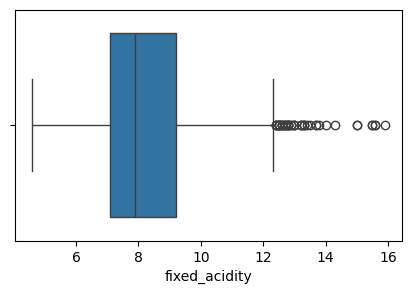

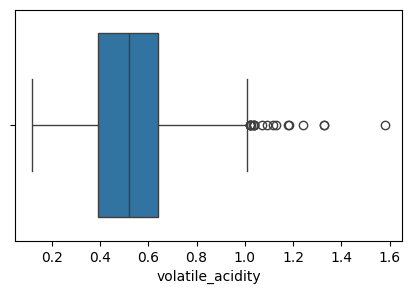

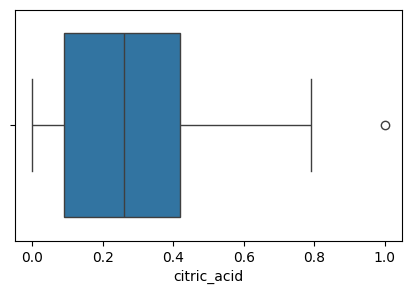

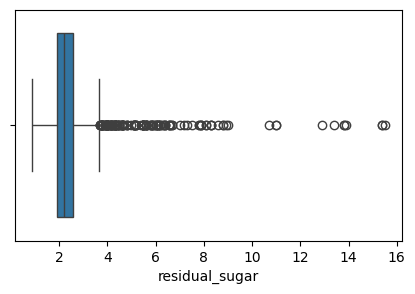

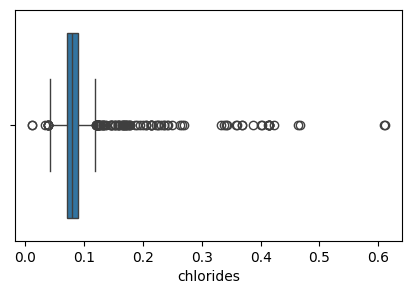

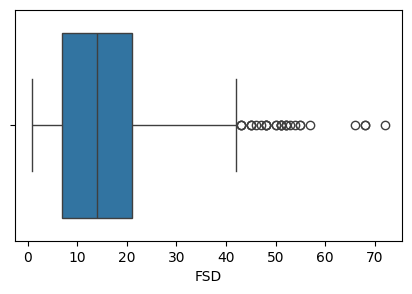

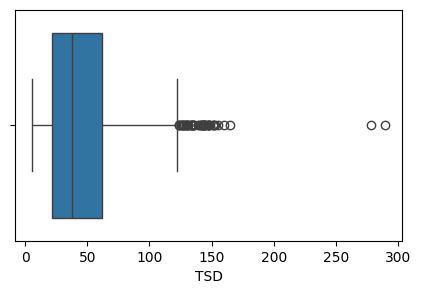

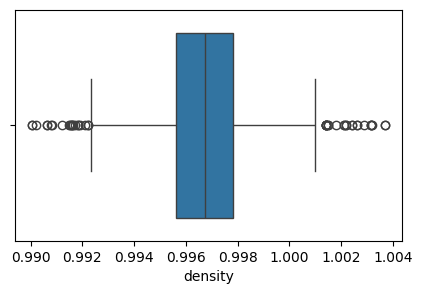

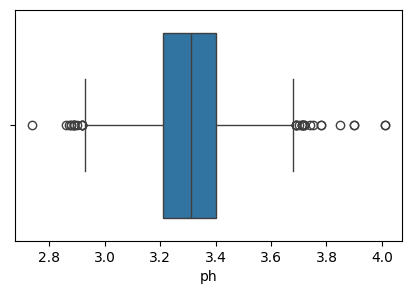

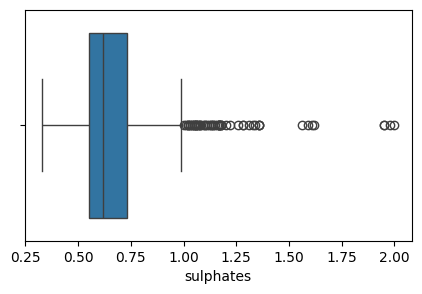

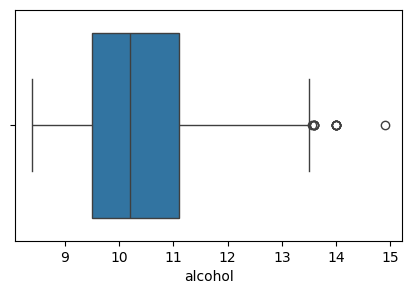

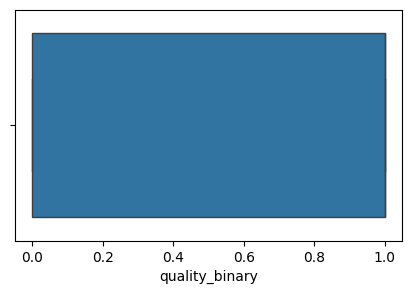

In [ ]:
for i in num_cols:
  plt.figure(figsize=(5,3))
  sns.boxplot(x=data[i])

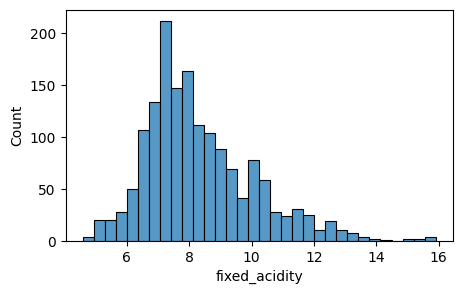

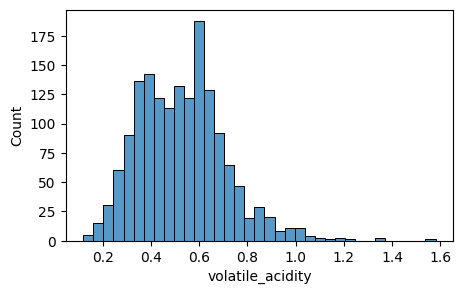

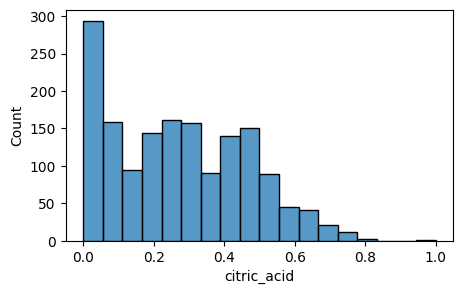

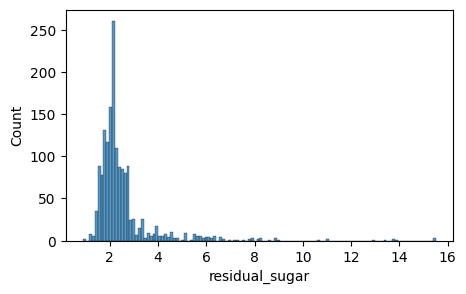

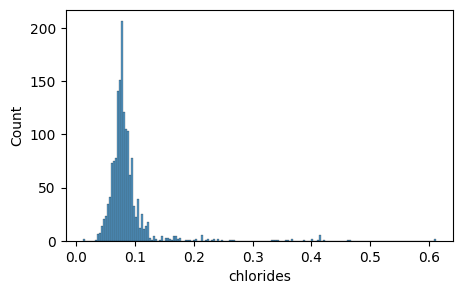

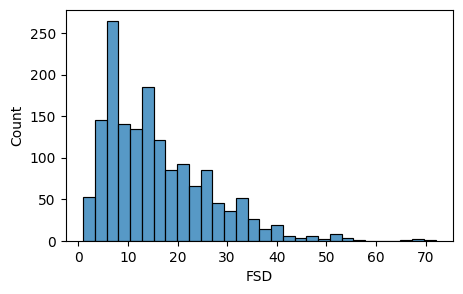

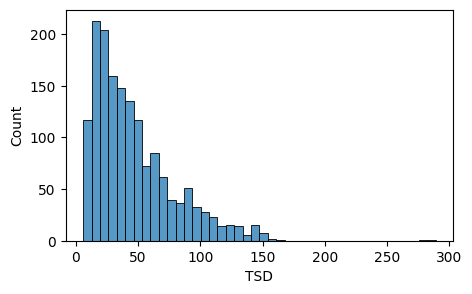

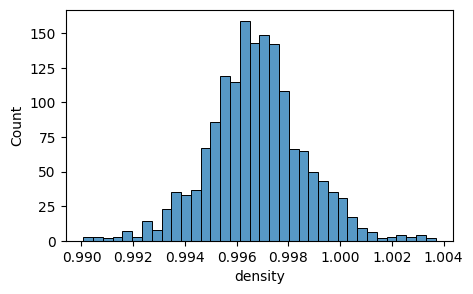

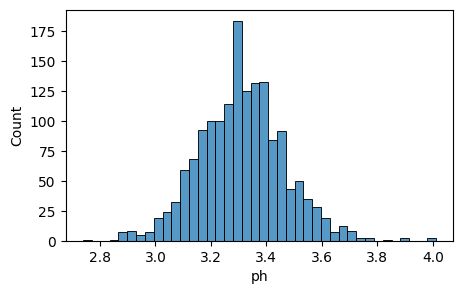

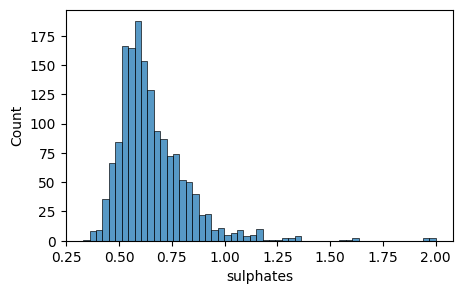

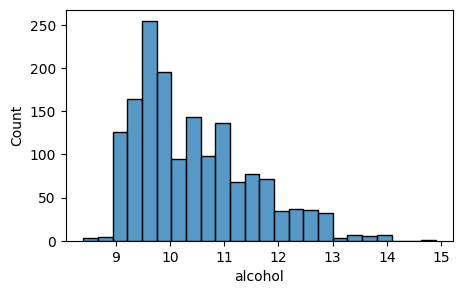

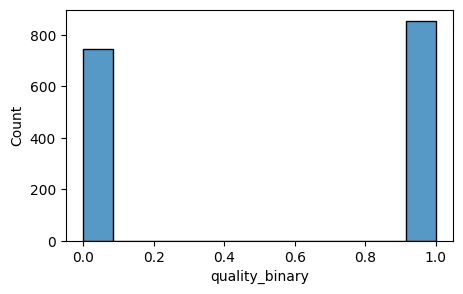

In [ ]:
for i in num_cols:
  plt.figure(figsize=(5,3))
  sns.histplot(x=data[i])

In [ ]:
# All data is right skewed except for ph and density. Since not handling outliers and there are no null values will not proceed with those steps in this.
# all num data so no need to replace anything inside data either.

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
Encoder= LabelEncoder()
Ordinal = OrdinalEncoder()
Onehot = OneHotEncoder()

In [ ]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,FSD,TSD,density,ph,sulphates,alcohol,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# No encoding needed since all data is numerical already.

In [ ]:
X = data.drop(columns = ['quality_binary'])
Y = data['quality_binary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Need to discuss in class for this dataset. Used square root but no change.
Y_train_log =  np.sqrt(Y_train)
Y_test_log =  np.sqrt(Y_test)

<Axes: xlabel='quality_binary', ylabel='Count'>

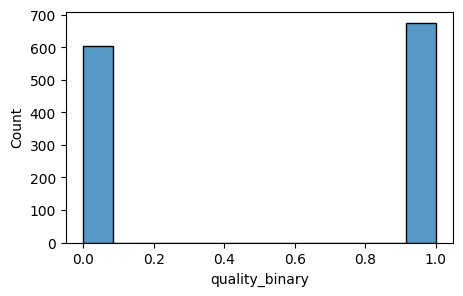

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(x=Y_train_log)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[101,  40],
       [ 46, 133]])

In [ ]:
accuracy_score(Y_test,y_pred)

0.73125

In [ ]:
precision_score(Y_test,y_pred)

0.7687861271676301

In [ ]:
f1_score(Y_test,y_pred)

0.7556818181818182

In [ ]:
recall_score(Y_test,y_pred)

0.7430167597765364

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       141
           1       0.77      0.74      0.76       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate , thresholds = roc_curve(Y_test,y_pred)
auc_score = auc(false_positive_rate, true_positive_rate)

In [ ]:
auc_score

np.float64(0.7296644082570625)

In [ ]:
false_positive_rate, true_positive_rate , thresholds = roc_curve(Y_test,y_pred)
false_positive_rate

array([0.        , 0.28368794, 1.        ])

In [ ]:
true_positive_rate

array([0.        , 0.74301676, 1.        ])